##  Assignment 34 - 10 March 2023 : Divya Pardeshi

__Q1: What is Estimation Statistics? Explain point estimate and interval estimate.__

__Ans.__

**Estimation in Statistics**:

Estimation in statistics involves the process of estimating population parameters (such as mean, variance, proportion, etc.) based on sample data. It aims to provide information about the characteristics of a population using information from a representative sample. Estimation is important because it allows us to make informed inferences and draw conclusions about a population without having to collect data from the entire population.

There are two main types of estimation: point estimation and interval estimation.

1. **Point Estimate**:
A point estimate is a single value that is used as the "best guess" or estimate of the population parameter. It's derived from sample data and provides a single value that represents the parameter of interest.

For example, if you're estimating the average height of students in a school, a point estimate could be the sample mean height of the students.

Mathematically, a point estimate is often denoted by a symbol such as $\hat{\theta}$, where $\theta$ represents the population parameter. For instance, $\hat{\mu}$ could represent the point estimate of the population mean.

2. **Interval Estimate**:
An interval estimate, also known as a confidence interval, provides a range of values within which the true population parameter is likely to lie. It recognizes the inherent uncertainty in estimation and provides a level of confidence about the accuracy of the estimate.

For example, if you calculate a 95% confidence interval for the population mean height of students, it might be (165 cm, 175 cm), indicating that you're 95% confident that the true population mean height falls within this interval.

The interval estimate is typically represented as $(\text{lower bound}, \text{upper bound})$ and is accompanied by a confidence level (such as 90%, 95%, or 99%). The confidence level reflects the probability that the interval contains the true population parameter.

In summary, estimation in statistics involves determining the values of population parameters using sample data. Point estimates provide single values that represent parameter estimates, while interval estimates (confidence intervals) provide ranges of values that likely contain the true parameter value with a certain level of confidence.

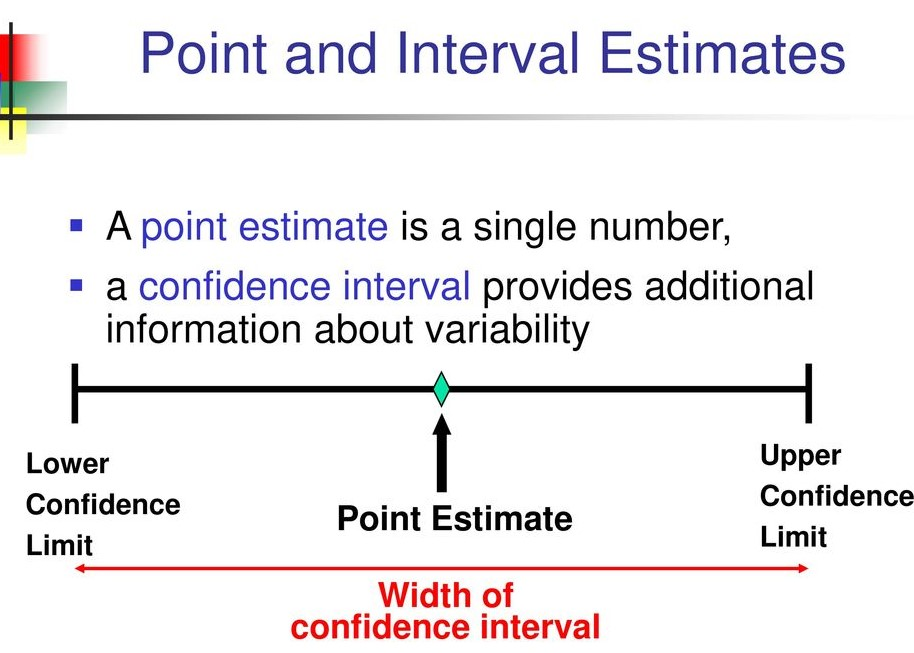

__Q2. Write a Python function to estimate the population mean using a sample mean and standard
deviation.__

__Ans.__

In [1]:
import math
import scipy.stats as stats
import numpy as np
import random

# Function to estimate population mean and confidence interval
def estimate_pop_mean(samples, confidence_level=0.95):
    sample_mean = np.mean(samples)
    sample_std = np.std(samples, ddof=1)  # Using Bessel's correction for sample standard deviation

    alpha = 1 - confidence_level
    dof = len(samples) - 1
    t_value = stats.t.ppf(1 - alpha/2, dof)

    std_error = sample_std / math.sqrt(len(samples))
    margin_of_error = t_value * std_error

    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error

    return sample_mean, (lower_bound, upper_bound)

# Set random seed for reproducibility
np.random.seed(42)

# Create a population of 1000 random values between 0 and 100
population_size = 1000
population = np.random.uniform(low=0, high=100, size=population_size)

# Take a random sample of 100 values from the population
sample_size = 100
sample = random.sample(list(population), sample_size)

# Estimate the population mean and interval using the sample data
estimated_mean, confidence_interval = estimate_pop_mean(sample)

# Print the results
print(f"ESTIMATED population mean point estimate: {estimated_mean:.2f}")
print(f"ESTIMATED population mean with 95% confidence interval: ({confidence_interval[0]:.2f} to {confidence_interval[1]:.2f})")
print('\n==========================================================================================================\n')
# Printing Actual population mean 
print(f"ACTUAL Population mean: {np.mean(population):.2f}")


ESTIMATED population mean point estimate: 41.88
ESTIMATED population mean with 95% confidence interval: (36.10 to 47.66)


ACTUAL Population mean: 49.03


__Q3: What is Hypothesis testing? Why is it used? State the importance of Hypothesis testing.__

**Hypothesis Testing**:

Hypothesis testing is a statistical method used to make decisions or draw conclusions about a population based on sample data. It involves formulating two competing hypotheses: the null hypothesis (denoted as $H_0$) and the alternative hypothesis (denoted as $H_1$ or $H_a$). The goal of hypothesis testing is to assess the evidence provided by the sample data and determine whether there is enough evidence to support rejecting the null hypothesis in favor of the alternative hypothesis.

The basic steps in hypothesis testing include:
1. Formulating the null and alternative hypotheses.
2. Collecting sample data and calculating a test statistic.
3. Determining a significance level (alpha) that defines the threshold for rejecting the null hypothesis.
4. Comparing the test statistic to critical values (from a distribution) or p-values to make a decision.
5. Drawing a conclusion about the null hypothesis based on the comparison.

**Importance of Hypothesis Testing**:

Hypothesis testing plays a crucial role in the scientific and research process for several reasons:

1. **Informed Decision-Making**: Hypothesis testing provides a structured framework for making informed decisions based on empirical evidence. It helps researchers avoid making conclusions solely based on intuition or anecdotal observations.

2. **Scientific Validity**: Hypothesis testing ensures that scientific findings are backed by statistical evidence. It helps researchers avoid drawing unwarranted conclusions from data that might be subject to randomness.

3. **Validity of Research Results**: By subjecting hypotheses to rigorous testing, researchers can determine whether their findings are statistically significant or merely due to chance. This enhances the validity and reliability of research results.

4. **Comparative Analysis**: Hypothesis testing allows researchers to compare different scenarios, treatments, interventions, or strategies and assess their effectiveness. This is crucial in fields like medicine, social sciences, and engineering.

5. **Disproving Incorrect Assumptions**: Hypothesis testing enables researchers to challenge existing assumptions or beliefs. If the null hypothesis is rejected, it indicates that the current assumption might be incorrect.

6. **Decision-Making in Business and Industry**: Hypothesis testing is also used in business and industry to make informed decisions about product quality, process improvement, marketing strategies, and more.

7. **Legal and Regulatory Compliance**: In legal cases, hypothesis testing can be used to provide evidence for or against a certain claim or accusation.

8. **Academic Research**: In academic research, hypothesis testing contributes to advancing knowledge by establishing new relationships or confirming existing theories.

In summary, hypothesis testing is a fundamental statistical tool that allows researchers to draw meaningful conclusions from data. It provides a structured approach to decision-making, enhances the validity of research, and plays a critical role in various fields by guiding evidence-based decision-making and advancing our understanding of the world.

![Hypothesis Testing](https://i.ytimg.com/vi/DlwOTOydeyk/maxresdefault.jpg)

__Q4. Create a hypothesis that states whether the average weight of male college students is greater than
the average weight of female college students.__

__Ans.__

**Null Hypothesis** $H_0$:
The average weight of male college students is equal to or less than the average weight of female college students.

**Alternative Hypothesis** $H_1$:
The average weight of male college students is greater than the average weight of female college students.





In symbols:
- $H_0$: $\mu_{\text{male}} \leq \mu_{\text{female}}$
- $H_a$: $\mu_{\text{male}} > \mu_{\text{female}}$

Here, $\mu_{\text{male}}$ represents the average weight of male college students, and $\mu_{\text{female}}$ represents the average weight of female college students.

To test this hypothesis, you would collect data on the weights of male and female college students, calculate their respective sample means, and perform hypothesis testing using appropriate statistical tests to determine whether there is enough evidence to support the alternative hypothesis that the average weight of male college students is greater than that of female college students.

__Q5. Write a Python script to conduct a hypothesis test on the difference between two population means,
given a sample from each population.__

__Ans.__

In [2]:
import numpy as np
from scipy.stats import ttest_ind

# Generate two random samples from different populations
np.random.seed(42)  # For reproducibility
sample_size = 50
population_mean_1 = 100
population_std_1 = 15
sample_1 = np.random.normal(loc=population_mean_1, scale=population_std_1, size=sample_size)

population_mean_2 = 105
population_std_2 = 18
sample_2 = np.random.normal(loc=population_mean_2, scale=population_std_2, size=sample_size)

# Perform two-sample t-test for independent samples
t_statistic, p_value = ttest_ind(sample_1, sample_2)

# Define the significance level (alpha)
alpha = 0.05

# Print the results
print("Sample 1 mean:", np.mean(sample_1))
print("Sample 2 mean:", np.mean(sample_2))
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Check if p-value is less than alpha to make a decision
if p_value < alpha:
    print("Reject null hypothesis: The population means are different.")
else:
    print("Fail to reject null hypothesis: The population means are equal.")


Sample 1 mean: 96.61789142115789
Sample 2 mean: 105.32005566842314
T-statistic: -2.920844508993127
P-value: 0.0043325923210353195
Reject null hypothesis: The population means are different.


__Q6: What is a null and alternative hypothesis? Give some examples.__

__Ans.__

**Null Hypothesis** $H_0$:

The null hypothesis is a statement of no effect or no difference. It represents the default assumption that there is no significant relationship or effect between variables. In statistical hypothesis testing, the null hypothesis is typically what researchers aim to test against. If there's strong evidence against the null hypothesis, it may be rejected in favor of the alternative hypothesis.

**Alternative Hypothesis** $H_1$ or $H_a$:

The alternative hypothesis is a statement that contradicts the null hypothesis. It suggests that there is a significant relationship, effect, or difference between variables. It represents what the researcher hopes to demonstrate or find evidence for through data analysis.

Here are some examples to illustrate null and alternative hypotheses:

**Example 1: Medical Treatment**
- Null Hypothesis $H_0$: The new drug has no effect on lowering blood pressure.
- Alternative Hypothesis $H_1$: The new drug has a significant effect on lowering blood pressure.

**Example 2: Marketing Campaign**
- Null Hypothesis $H_0$: The new marketing strategy has no impact on sales.
- Alternative Hypothesis $H_1$: The new marketing strategy has a significant impact on sales.

**Example 3: Education**
- Null Hypothesis  $H_0$: The online learning platform does not improve student test scores.
- Alternative Hypothesis $H_1$: The online learning platform significantly improves student test scores.

**Example 4: Gender Differences**
- Null Hypothesis  $H_0$: There is no gender difference in average height.
- Alternative Hypothesis $H_1$: There is a significant gender difference in average height.

**Example 5: Product Quality**
- Null Hypothesis  $H_0$: The two manufacturing methods produce products with the same quality.
- Alternative Hypothesis $H_1$: The two manufacturing methods produce products with different qualities.

In each example, the null hypothesis reflects the absence of an effect or relationship, while the alternative hypothesis suggests the presence of a significant effect or relationship. Researchers use statistical tests to analyze data and determine whether there's enough evidence to either reject the null hypothesis in favor of the alternative hypothesis or fail to reject the null hypothesis.

__Q7: Write down the steps involved in hypothesis testing.__

__Ans.__

Hypothesis testing is a statistical method used to make inferences about population parameters based on a sample of data. It involves a series of steps to determine whether there is enough evidence to support or reject a specific hypothesis. Here are the typical steps involved in hypothesis testing:

1. **Formulate the Hypotheses:**
   - **Null Hypothesis (H0):** This is the default or status quo hypothesis. It often represents the absence of an effect or no difference. It's denoted as H0.
   - **Alternative Hypothesis (Ha or H1):** This is the hypothesis you want to test. It represents the presence of an effect or a specific difference from the null hypothesis.

2. **Select the Significance Level (α):**
   - The significance level, often denoted as α, represents the probability of making a Type I error (rejecting the null hypothesis when it is true). Common values for α are 0.05 (5%) and 0.01 (1%), but the choice depends on the specific application and the desired balance between Type I and Type II errors.

3. **Collect and Analyze Data:**
   - Collect a sample of data relevant to the hypothesis being tested.
   - Perform appropriate data analysis, such as calculating sample statistics (e.g., mean, standard deviation), and, if necessary, conduct inferential statistics like t-tests, chi-squared tests, ANOVA, etc., depending on the nature of the data and the hypothesis.

4. **Determine the Test Statistic:**
   - Calculate a test statistic that quantifies the difference between the sample data and what is expected under the null hypothesis. The choice of test statistic depends on the type of data and the hypothesis being tested.

5. **Calculate the P-value:**
   - The p-value is the probability of obtaining results as extreme as, or more extreme than, the observed data, assuming the null hypothesis is true. A smaller p-value indicates stronger evidence against the null hypothesis.

6. **Compare P-value to α:**
   - If the p-value is less than or equal to the chosen significance level (α), you reject the null hypothesis in favor of the alternative hypothesis. This suggests that there is enough evidence to support the alternative hypothesis.
   - If the p-value is greater than α, you fail to reject the null hypothesis. This means that there isn't enough evidence to support the alternative hypothesis.

7. **Make a Decision:**
   - Based on the comparison of the p-value to α, make a decision regarding the null hypothesis. This decision is often communicated in terms of whether you "reject" or "fail to reject" the null hypothesis.

8. **Draw a Conclusion:**
   - Interpret the results in the context of your research question. If you rejected the null hypothesis, explain what this means in terms of the hypothesis being tested and its implications.

9. **Report the Results:**
   - Communicate your findings, including the test statistic, p-value, and your decision about the null hypothesis, in a clear and concise manner.

10. **Consider Practical Significance:**
    - Even if a result is statistically significant, it's essential to consider whether the observed effect is practically significant or meaningful in the real-world context.

11. **Repeat and Validate (Optional):**
    - In some cases, it may be necessary to replicate the study or conduct further research to validate the findings.

Hypothesis testing is a fundamental process in statistical analysis that helps researchers draw conclusions and make decisions based on data. It's important to understand the concepts and assumptions behind hypothesis testing to apply it effectively in various fields of study.

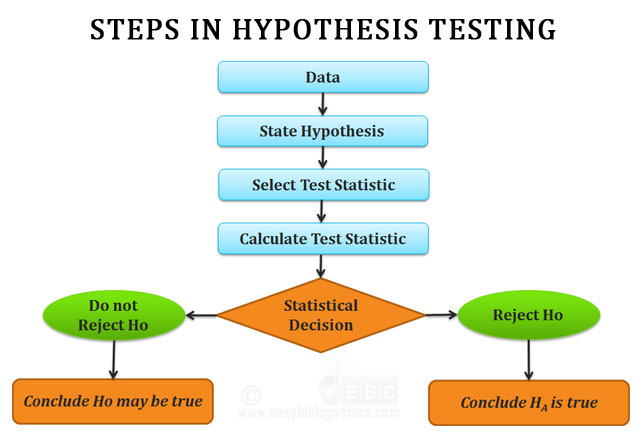

__Q8. Define p-value and explain its significance in hypothesis testing.__

__Ans.__

The p-value, or probability value, is a fundamental concept in hypothesis testing that quantifies the strength of evidence against the null hypothesis. It measures the probability of observing data as extreme as, or more extreme than, the data actually observed, assuming that the null hypothesis is true. In simpler terms, the p-value indicates how likely it is to obtain the observed results if the null hypothesis is correct.

Here's a more detailed explanation of the significance of the p-value in hypothesis testing:

1. **Interpreting the p-value:**
   - A small p-value (typically less than the chosen significance level, α) suggests that the observed data is unlikely to have occurred under the assumption of the null hypothesis. This provides evidence against the null hypothesis.
   - A large p-value suggests that the observed data could reasonably have occurred by chance, even if the null hypothesis is true. This doesn't provide strong evidence against the null hypothesis.

2. **Decision Rule:**
   - In hypothesis testing, you compare the calculated p-value to the chosen significance level (α). The common threshold for significance is 0.05, but this value can vary depending on the field, context, and desired level of risk for Type I errors.
   - If p-value ≤ α: You reject the null hypothesis. This means that the evidence in the data is strong enough to suggest that the null hypothesis is unlikely to be true.
   - If p-value > α: You fail to reject the null hypothesis. This means that there isn't sufficient evidence in the data to conclude that the null hypothesis is false.

3. **No Proof of the Null Hypothesis:**
   - It's important to note that a high p-value doesn't prove the null hypothesis is true. It simply indicates that the data does not provide strong evidence to reject it. Failing to reject the null hypothesis doesn't mean the null hypothesis is definitively true.

4. **Effect Size and Practical Significance:**
   - While the p-value provides information about statistical significance, it doesn't give insight into the size of the effect or its practical importance. Even if an effect is statistically significant, it's essential to consider whether the observed difference is practically significant or relevant in the real world.

5. **Replicability and Context:**
   - The p-value is affected by the sample size. A larger sample size can result in smaller p-values, even for small effects. Therefore, both effect size and sample size should be considered when interpreting p-values.
   - The interpretation of p-values should always be done in the context of the specific research question, the quality of the data, and the assumptions underlying the statistical test.

6. **Caution against Misinterpretation:**
   - A p-value alone does not provide a comprehensive summary of the strength of evidence or the validity of a hypothesis. It's just one piece of the puzzle in hypothesis testing.

In summary, the p-value serves as a tool to assess the strength of evidence against the null hypothesis. It helps researchers make informed decisions about whether to reject or fail to reject the null hypothesis, but it should always be interpreted alongside other relevant information, such as effect size, practical significance, and the broader context of the research.

![p-value significance](https://desktop.arcgis.com/en/arcmap/latest/tools/spatial-statistics-toolbox/GUID-CBF63B74-D1B2-44FC-A316-7AC2B1C1D464-web.png)

__Q9. Generate a Student's t-distribution plot using Python's matplotlib library, with the degrees of freedom
parameter set to 10.__

__Ans.__

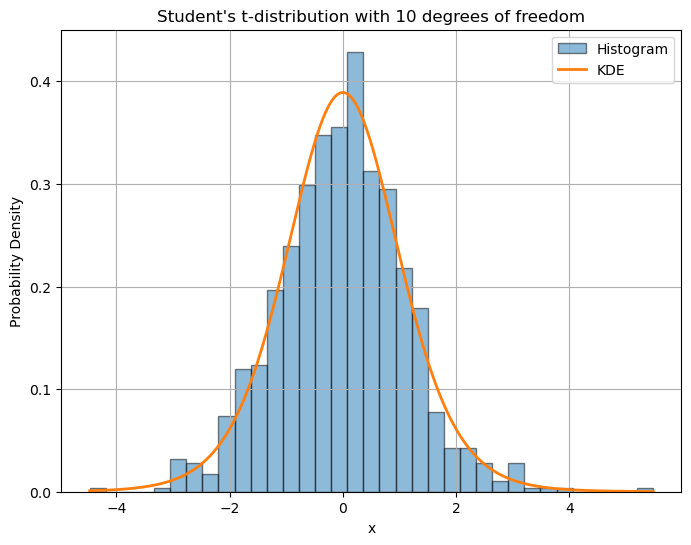

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

# Degrees of freedom
df = 10

# Generate 1000 random values from the t-distribution with 10 degrees of freedom
data = t.rvs(df, size=1000)

# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the histogram
ax.hist(data, bins='fd', density=True, alpha=0.5, edgecolor='black', label='Histogram')

# Calculate KDE using a range of x values
kde_xs = np.linspace(data.min(), data.max(), 1000)
kde = t.pdf(kde_xs, df)

# Plot the KDE
ax.plot(kde_xs, kde, label='KDE', linewidth=2)

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('Probability Density')
ax.set_title(f'Student\'s t-distribution with {df} degrees of freedom')
ax.legend()

# Display the plot
plt.grid()
plt.show()


__Q10. Write a Python program to calculate the two-sample t-test for independent samples, given two
random samples of equal size and a null hypothesis that the population means are equal.__

__Ans.__

In [4]:
import numpy as np
from scipy.stats import ttest_ind

# Generate two random samples with equal size
sample_size = 50
sample_1 = np.random.normal(loc=10, scale=2, size=sample_size)
sample_2 = np.random.normal(loc=12, scale=2, size=sample_size)

# Perform the two-sample t-test for independent samples
t_statistic, p_value = ttest_ind(sample_1, sample_2)

# Define the significance level (alpha)
alpha = 0.05

# Print the results
print("Sample 1 mean:", np.mean(sample_1))
print("Sample 2 mean:", np.mean(sample_2))
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Check if p-value is less than alpha to make a decision
if p_value < alpha:
    print("Reject null hypothesis: The population means are different.")
else:
    print("Fail to reject null hypothesis: The population means are equal.")


Sample 1 mean: 10.107117923495741
Sample 2 mean: 11.969182558037526
T-statistic: -4.6578532297437505
P-value: 1.0057883998947094e-05
Reject null hypothesis: The population means are different.


__Q11: What is Student’s t distribution? When to use the t-Distribution.__

__Ans.__

The Student's t-distribution, often simply referred to as the t-distribution, is a probability distribution that is used in statistical hypothesis testing and confidence interval estimation. It is similar in shape to the normal distribution but has heavier tails, making it more suitable for smaller sample sizes or when the population standard deviation is unknown.

The t-distribution is characterized by its degrees of freedom (df), which determine its shape. The degrees of freedom in the t-distribution are related to the sample size and play a crucial role in how the distribution behaves. As the degrees of freedom increase, the t-distribution becomes closer to a standard normal distribution (z-distribution).

When to use the t-distribution:

1. **Small Sample Sizes:** When dealing with small sample sizes (typically less than 30) and you need to perform inferential statistical analysis (e.g., hypothesis testing or confidence interval estimation), the t-distribution is more appropriate than the normal distribution. This is because the t-distribution's heavier tails account for the increased variability that can occur with small samples.

2. **Population Standard Deviation Unknown:** When the population standard deviation is unknown and must be estimated from the sample data, the t-distribution is used. The t-distribution takes into account the uncertainty introduced by the estimation of the standard deviation, providing more accurate results.

3. **Hypothesis Testing and Confidence Intervals:** The t-distribution is primarily used in hypothesis testing and confidence interval estimation when working with sample means. It's used to test hypotheses about population means when the sample size is small or when the population standard deviation is unknown.

4. **Comparing Means:** When comparing two sample means from independent samples (e.g., two groups in an experiment) or from dependent samples (e.g., before and after measurements), the t-distribution is often used to calculate test statistics and p-values.

5. **Regression Analysis:** In linear regression analysis, t-distributions are used to test the significance of regression coefficients and to construct confidence intervals for these coefficients.

It's important to note that as sample sizes increase, the t-distribution approaches the normal distribution. Therefore, for larger sample sizes (typically greater than 30) or when the population standard deviation is known, the normal distribution (z-distribution) can be used in place of the t-distribution.

In summary, the Student's t-distribution is a critical tool in statistical analysis when working with small sample sizes, estimating population means, and performing hypothesis tests or constructing confidence intervals. It adjusts for the uncertainty introduced by small sample sizes and unknown population standard deviations, providing more accurate results in such scenarios.

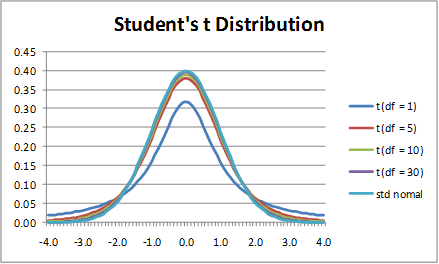

__Q12: What is t-statistic? State the formula for t-statistic.__

__Ans.__

The t-statistic (also known as the t-value) is a test statistic used in hypothesis testing to determine if the difference between sample means is statistically significant. It measures how many standard errors the sample mean is away from the hypothesized population mean under the null hypothesis. In other words, it quantifies the difference between the observed sample mean and the hypothesized population mean, accounting for the variability in the sample data.

The formula for calculating the t-statistic depends on the context and type of hypothesis test being performed. There are two common cases: the one-sample t-test and the two-sample (independent samples) t-test.

1. **One-Sample t-Test:**
   - The one-sample t-test is used to compare the sample mean to a known or hypothesized population mean.
   - Formula for the t-statistic in a one-sample t-test:
   
     ![One-Sample t-Test Formula](https://latex.codecogs.com/png.latex?%5Ctext%7Bt-statistic%7D%20%3D%20%5Cfrac%7B%5Cbar%7Bx%7D%20-%20%5Cmu%7D%7Bs%20/%20%5Csqrt%7Bn%7D%7D)

   Where:
   - $ \bar{x} $ is the sample mean.
   - $ \mu $ is the hypothesized population mean under the null hypothesis.
   - $ s $ is the sample standard deviation.
   - $n $ is the sample size.

2. **Two-Sample (Independent Samples) t-Test:**
   - The two-sample t-test compares the means of two independent samples to determine if they are significantly different from each other.
   - Formula for the t-statistic in a two-sample t-test:
   
     ![Two-Sample t-Test Formula](https://latex.codecogs.com/png.latex?%5Ctext%7Bt-statistic%7D%20%3D%20%5Cfrac%7B%5Cbar%7Bx%7D_1%20-%20%5Cbar%7Bx%7D_2%7D%7B%5Csqrt%7Bs_1%5E2%20/%20n_1%20+%20s_2%5E2%20/%20n_2%7D%7D)

   Where:
   - $\bar{x}_1 $ and $\bar{x}_2$ are the sample means of the two groups.
   - $s_1 $ and $ s_2 $ are the sample standard deviations of the two groups.
   - $n_1 $ and $ n_2 $ are the sample sizes of the two groups.

In both cases, the t-statistic measures the difference between the means of the samples relative to the variability within the samples. A larger absolute value of the t-statistic indicates a larger difference between the sample means and provides evidence against the null hypothesis of equal means (assuming other conditions are met).

The t-statistic is then compared to critical values from the t-distribution or the calculated p-value to make a decision about whether to reject or fail to reject the null hypothesis in a hypothesis test.

__Q13. A coffee shop owner wants to estimate the average daily revenue for their shop. They take a random
sample of 50 days and find the sample mean revenue to be $500 with a standard deviation of $50.
Estimate the population mean revenue with a 95% confidence interval.__

__Ans.__

To estimate the population mean revenue with a 95% confidence interval, you can use the formula for the confidence interval for a population mean when the sample size is sufficiently large (usually considered as \(n \geq 30\)). The formula is:

$ \text{Confidence Interval} = \bar{x} \pm Z \times \frac{s}{\sqrt{n}} $

Where:
- $\bar{x}$ is the sample mean revenue (\$500 in this case).
- $Z$ is the Z-score associated with the desired confidence level. For a 95% confidence interval, the Z-score is approximately 1.96.
- $s$ is the sample standard deviation (\$50 in this case).
- $n$ is the sample size (50 in this case).

Now, let's calculate the confidence interval:

$ \text{Confidence Interval} = 500 \pm 1.96 \times \frac{50}{\sqrt{50}} $

Calculating this gives:

Lower Limit: $500 - 1.96 \times \frac{50}{\sqrt{50}} \approx 487.42$

Upper Limit: $500 + 1.96 \times \frac{50}{\sqrt{50}} \approx 512.58$

So, the 95% confidence interval for the population mean revenue is approximately $487.42$ to $512.58$. 
This means that we are 95% confident that the true average daily revenue for the coffee shop falls within this interval based on the given sample data.

#### By Using Python code:

In [5]:
import math
import scipy.stats as stats

sample_mean = 500
sample_std = 50
sample_size = 50

alpha = 0.05  # significance level
dof = sample_size - 1  # degrees of freedom
t_value = stats.t.ppf(1 - alpha/2, dof)  # two-tailed t-value

std_error = sample_std / math.sqrt(sample_size)
margin_of_error = t_value * std_error

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"The 95% confidence interval for the population mean revenue is: (${lower_bound:.2f}, ${upper_bound:.2f})")

The 95% confidence interval for the population mean revenue is: ($485.79, $514.21)


__Q14. A researcher hypothesizes that a new drug will decrease blood pressure by 10 mmHg. They conduct a
clinical trial with 100 patients and find that the sample mean decrease in blood pressure is 8 mmHg with a
standard deviation of 3 mmHg. Test the hypothesis with a significance level of 0.05.__

__Ans.__

To test the researcher's hypothesis that the new drug will decrease blood pressure by 10 mmHg, we can perform a one-sample t-test. 

**Null Hypothesis** $H_0$:  is that the drug does not decrease blood pressure by 10 mmHg ($\mu = 10$)

**Alternative Hypothesis** $H_1$: The drug does decrease blood pressure by 10 mmHg (\(\mu < 10\)).

Given the sample mean decrease in blood pressure $\bar{x} = 8$, the sample standard deviation $s$ = 3$, sample size (n = 100),

and the significance level $\alpha = 0.05$, one-tailed test,

we can calculate the t-statistic using the formula:

$ \text{t-statistic} = \frac{\bar{x} - \mu}{s/\sqrt{n}} $

Substitute the values:

$\text{t-statistic} = \frac{8 - 10}{3/\sqrt{100}} = -6.67 $

Now, we need to find the critical t-value corresponding to the significance level and degrees of freedom $(n - 1)$ from the t-distribution table or a statistical software. With $n = 100$, the degrees of freedom is $99$.

For a one-tailed test at a significance level of $0.05$, the critical t-value is approximately $-1.660$. 

Since the calculated t-statistic $-6.67$ is more extreme than the critical t-value $-1.660$, we reject the null hypothesis.

In conclusion, at a significance level of $0.05$, we have enough evidence to conclude that the new drug does decrease blood pressure by more than 10 mmHg based on the sample data.

#### By Using Python Code:

In [6]:
import math
import scipy.stats as stats

# sample size
n = 100

# sample mean and standard deviation
sample_mean = 8
sample_std = 3

# hypothesized population mean
pop_mean = 10

# null hypothesis: the true mean decrease in blood pressure is equal to 10 mmHg
# alternative hypothesis: the true mean decrease in blood pressure is less than 10 mmHg
null_hypothesis = "The true mean decrease in blood pressure is equal to 10 mmHg"
alternative_hypothesis = "The true mean decrease in blood pressure is less than 10 mmHg"

# calculate the t-value and p-value
t_value = (sample_mean - pop_mean) / (sample_std / math.sqrt(n))
p_value = stats.t.cdf(t_value, df=n-1)

# compare the p-value with the significance level
significance_level = 0.05

if p_value < significance_level:
    print(f"The p-value is {p_value}, which is less than the significance level of {significance_level}.")
    print(f"Reject the null hypothesis: {null_hypothesis}.")
    print(f"Conclusion: {alternative_hypothesis}.")
else:
    print(f"The p-value is {p_value}, which is greater than the significance level of {significance_level}.")
    print(f"Fail to reject the null hypothesis: {null_hypothesis}.")
    print("Conclusion: There is not enough evidence to conclude that the new drug decreases blood pressure by a statistically significant amount.")


The p-value is 7.506144504985108e-10, which is less than the significance level of 0.05.
Reject the null hypothesis: The true mean decrease in blood pressure is equal to 10 mmHg.
Conclusion: The true mean decrease in blood pressure is less than 10 mmHg.


__Q15. An electronics company produces a certain type of product with a mean weight of 5 pounds and a
standard deviation of 0.5 pounds. A random sample of 25 products is taken, and the sample mean weight
is found to be 4.8 pounds. Test the hypothesis that the true mean weight of the products is less than 5
pounds with a significance level of 0.01.__

__Ans.__

To test the hypothesis that the true mean weight of the products is less than 5 pounds, we can perform a one-sample t-test. The null hypothesis $H_0$ is that the mean weight is equal to or greater than 5 pounds $\mu \geq 5$, and the alternative hypothesis $H_a$ is that the mean weight is less than 5 pounds $\mu < 5$.

Given the sample mean weight $\bar{x} = 4.8$, the sample size $n = 25$, the population standard deviation $\sigma = 0.5$, and the significance level $\alpha = 0.01$, we can calculate the t-statistic using the formula:

$\text{t-statistic} = \frac{\bar{x} - \mu}{s/\sqrt{n}} $

Where $s$ is the sample standard deviation and $\mu$ is the hypothesized population mean under the null hypothesis.

Substitute the values:

$ \text{t-statistic} = \frac{4.8 - 5}{0.5/\sqrt{25}} = -2.0 $

Now, we need to find the critical t-value corresponding to the significance level and degrees of freedom $n - 1$ from the t-distribution table or a statistical software. With $n = 25$, the degrees of freedom is $24$.

For a one-tailed test at a significance level of $0.01$, the critical t-value is approximately $-2.492$.

Since the calculated t-statistic $-2.0$ is less extreme than the critical t-value $-2.492$, we fail to reject the null hypothesis.

In conclusion, at a significance level of $0.01$, we do not have enough evidence to conclude that the true mean weight of the products is less than 5 pounds based on the sample data.

#### By Using Python Code:

In [7]:
import math
import scipy.stats as stats

# population mean and standard deviation
pop_mean = 5
pop_std = 0.5

# sample size and sample mean
n = 25
sample_mean = 4.8

# null hypothesis: the true mean weight of the products is equal to 5 pounds
# alternative hypothesis: the true mean weight of the products is less than 5 pounds
null_hypothesis = "The true mean weight of the products is equal to 5 pounds"
alternative_hypothesis = "The true mean weight of the products is less than 5 pounds"

# calculate the t-value and p-value
t_value = (sample_mean - pop_mean) / (pop_std / math.sqrt(n))
p_value = stats.t.cdf(t_value, df=n-1)

# compare the p-value with the significance level
significance_level = 0.01

if p_value < significance_level:
    print(f"The p-value is {p_value:.4f}, which is less than the significance level of {significance_level}.")
    print(f"Reject the null hypothesis: {null_hypothesis}.")
    print(f"Conclusion: {alternative_hypothesis}.")
else:
    print(f"The p-value is {p_value:.4f}, which is greater than the significance level of {significance_level}.")
    print(f"Fail to reject the null hypothesis: {null_hypothesis}.")
    print("Conclusion: There is not enough evidence to conclude that the true mean weight of the products is less than 5 pounds.")

The p-value is 0.0285, which is greater than the significance level of 0.01.
Fail to reject the null hypothesis: The true mean weight of the products is equal to 5 pounds.
Conclusion: There is not enough evidence to conclude that the true mean weight of the products is less than 5 pounds.


__Q16. Two groups of students are given different study materials to prepare for a test. The first group 
(n1 =30) has a mean score of 80 with a standard deviation of 10, and the second group (n2 = 40) has a mean
score of 75 with a standard deviation of 8. Test the hypothesis that the population means for the two
groups are equal with a significance level of 0.01.__

__Ans.__

To test the hypothesis that the population means for the two groups are equal, we can use a two-sample t-test with the following null and alternative hypotheses:

**Null hypothesis**: The population means for the two groups are equal.

**Alternative hypothesis**: The population means for the two groups are not equal.

We can use the following formula to calculate the t-statistic: 
### $ t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $

#### By Using Python Code:

In [8]:
import scipy.stats as stats

# Sample 1 statistics
n1 = 30
x1 = 80
s1 = 10

# Sample 2 statistics
n2 = 40
x2 = 75
s2 = 8

# null hypothesis: The population means for the two groups are EQUAL
# alternative hypothesis: The population means for the two groups are NOT equal.
null_hypothesis = "The population means for the two groups are EQUAL"
alternative_hypothesis = "The population means for the two groups are not equal."

# Calculate the t-statistic
t = (x1 - x2) / ((s1**2 / n1) + (s2**2 / n2))**0.5

# Degrees of freedom
df = n1 + n2 - 2

# Calculate the p-value for the two-tailed test
p_value = stats.t.sf(abs(t), df) * 2

# Significance level
alpha = 0.01

# Test the hypothesis
if p_value < alpha:
    print(f"Reject the null hypothesis : {null_hypothesis}")
    print(f"Conclusion : {alternative_hypothesis}")
else:
    print("Fail to reject the null hypothesis.")
    print(f"Conclusion : {null_hypothesis}")

print("p-value: ", p_value)

Fail to reject the null hypothesis.
Conclusion : The population means for the two groups are EQUAL
p-value:  0.02761348036769749


__Q17. A marketing company wants to estimate the average number of ads watched by viewers during a TV
program. They take a random sample of 50 viewers and find that the sample mean is 4 with a standard
deviation of 1.5. Estimate the population mean with a 99% confidence interval.__

__Ans.__

To estimate the population mean with a 99% confidence interval, you can use the formula for the confidence interval for a population mean when you have a sample mean, sample standard deviation, and sample size. The formula is:

$\text{Confidence Interval} = \bar{x} \pm Z \times \frac{s}{\sqrt{n}}$

Where:
- $\bar{x}$ is the sample mean (4 in this case).
- $Z$ is the Z-score associated with the desired confidence level. For a 99% confidence interval, the Z-score is approximately 2.576 (for a two-tailed test).
- $s$ is the sample standard deviation (1.5 in this case).
- $n$ is the sample size (50 in this case).

Now, let's calculate the confidence interval:

$ \text{Confidence Interval} = 4 \pm 2.576 \times \frac{1.5}{\sqrt{50}} $

Calculating this gives:

Lower Limit: $4 - 2.576 \times \frac{1.5}{\sqrt{50}} \approx 3.693$

Upper Limit: $4 + 2.576 \times \frac{1.5}{\sqrt{50}} \approx 4.307$

So, the 99% confidence interval for the average number of ads watched by viewers during the TV program is approximately 3.693 to 4.307. This means that we are 99% confident that the true average number of ads watched falls within this interval based on the given sample data.

#### By using Python Code:

In [9]:
import scipy.stats as stats
import math

sample_mean = 4
sample_size = 50
sample_std_dev = 1.5
conf_level = 0.99

# calculate the t-value for the desired level of confidence and degrees of freedom
t_value = stats.t.ppf((1+conf_level)/2,sample_size-1)

# Calculate margin of error
margin_error = t_value * (sample_std_dev / math.sqrt(sample_size))

# Calculate confidence interval
lower_interval = sample_mean - margin_error
upper_interval = sample_mean + margin_error

# Print results
print("The population mean is between", round(lower_interval, 2), "and", round(upper_interval, 2), "with", conf_level * 100, "% confidence.")

The population mean is between 3.43 and 4.57 with 99.0 % confidence.
